In [1]:
import torch
model = torch.hub.load("./", 'custom', path='runs/train/300_hpc/weights/best.pt', source='local')  # local repo

YOLOv5 🚀 2024-4-24 Python-3.11.8 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline
im = cv2.imread("test_im.png")
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
np_img = np.array(im)

In [8]:
im.shape

(1396, 2516, 3)

In [9]:
results = model(im)  # inference
results.pandas().xyxy[0]  # Pandas DataFrame

,xmin,ymin,xmax,ymax,confidence,class,name


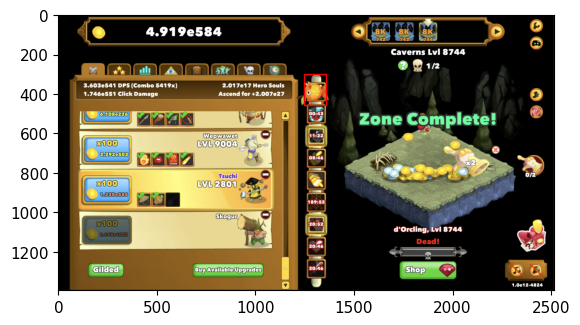

In [6]:
bboxes = results.xyxy[0].numpy()  # Bounding boxes in xyxy format

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(np_img)

# Add the bounding boxes as patches
for box in bboxes:
    x1, y1, x2, y2, conf, cls = box
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()